In [1]:
#@title Super market sales analisis
from google.colab import files
import pandas as pd
import numpy as np

uploaded = files.upload()

Saving supermarket_sales - Sheet1.xls to supermarket_sales - Sheet1.xls


####In the following analysis, we will be using a dataset from an anonymous supermarket company. The dataset contains records from three different branches located in Burma, covering a period of three months.

####you can get the data from https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

####Before diving into the analysis, let's start by getting to know our dataset and its columns. Our initial step will involve checking for any null values, the data types of each column, unique values, etc.

In [2]:
#@title The dataset
import io
sms = pd.read_csv(io.BytesIO(uploaded['supermarket_sales - Sheet1.xls']))
sms

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


#Data Exploration




####Now let's take a look to our data and see if we can understand it before making inferences













In [3]:
sms.info()
sms.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

0

In [4]:
sms.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [21]:
sms.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


# Is this supermarket chain being profitable?
#### Let's see if the gross income it's enough to overcome de costs of goods sold (cogs) and if theres a branch thats underperforming

In [5]:
Branches=sms.groupby('Branch')
cogs_bybranch=Branches['cogs'].sum()
income_bybranch=Branches['gross income'].sum()
total_profit=income_bybranch-cogs_bybranch
total_profit

Branch
A    -96086.0495
B    -96083.6080
C   -100038.3535
dtype: float64

#### As we can se here, all tree branches operates in negative numbers, this is due to cogs being just the cost of the product multiplied by the quantity and does not reflect the true cost of the product sold.

####This dataset is inaccuareate an does not relfect a real-life scenario, but we will go further on the analisys just as an excercie and see if we can encounter more issues


---

# Does gender has an impact on how people spend money within this supermarket chain?


In [6]:
sms['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [7]:
sms['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [8]:
#@markdown Now let's see if there is a preferences based on the customer's gender

cframe = sms[sms.Gender.notnull()]
gender_sales = np.where(cframe['Gender'].str.contains('Female'), 'Female', 'Male')
by_gender_sales = cframe.groupby(['Product line', gender_sales])
prod_counts_gender = by_gender_sales.size().unstack()
prod_counts_gender

,Female,Male
Product line,,
Electronic accessories,84,86
Fashion accessories,96,82
Food and beverages,90,84
Health and beauty,64,88
Home and lifestyle,79,81
Sports and travel,88,78


<Axes: ylabel='Product line'>

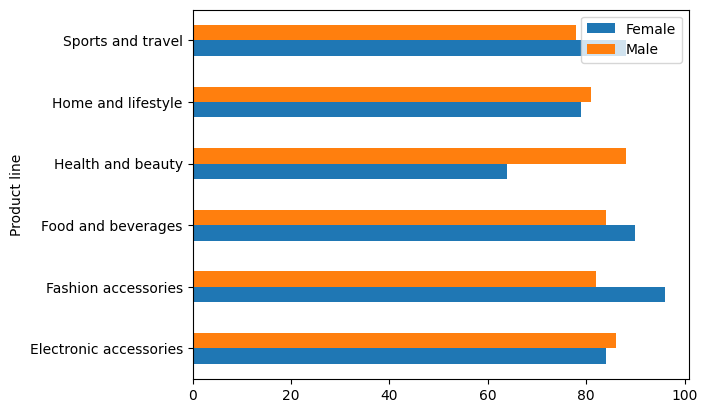

In [9]:
prod_counts_gender.plot(kind='barh')

####As we can apreciate in this exploration, im confident in asumming that we have a similar amount betwen male and female costumers wich can be another inaccuracy in our dataset.








In [10]:
#@markdown Is gender important when it comes to expend money? let's take a look
total_sales_bygender=sms.groupby('Gender')['Total'].sum()
total_frame=pd.DataFrame(total_sales_bygender)
total_frame

,Total
Gender,
Female,167882.925
Male,155083.824


<Axes: xlabel='Gender', ylabel='total'>

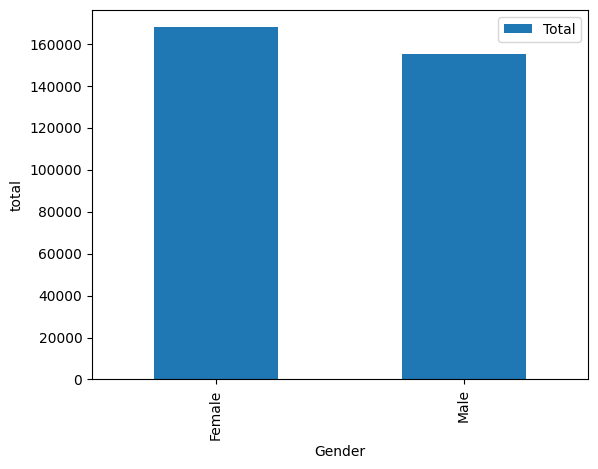

In [11]:
total_frame.plot(kind='bar', ylabel='total')

####This graph represents the difference in expenses between females and males, showing a slight variation of $12,799.101. The variation is not big enough to asumme that gender is important when it comes to expenses, or maybe it's another biased data due to our problematic dataset.



---

#Does date or time has an impact on spending habits?



In [12]:
#@markdown First of all, we have to convert the date column into date format and the extract the hours in the time column in order to reduce the number of unique values from 506 to 11
sms['Date'] = pd.to_datetime(sms['Date'])
sms['Time'] = pd.to_datetime(sms['Time'])
sms['Time'] = sms['Time'].dt.strftime('%H')



####Now lets' put our infromation in a table

In [13]:
Bframe = sms[sms.Branch.notnull()]
branch_sales = Bframe['Branch']
time_sales = Bframe.groupby(['Time', branch_sales])
time_sales_bybranch = time_sales.size().unstack()
time_sales_bybranch

Branch,A,B,C
Time,,,
10,38,26,37
11,35,33,22
12,33,25,31
13,31,38,34
14,25,30,28
15,37,32,33
16,32,17,28
17,27,20,27
18,33,35,25


In [14]:
time_counts=sms.Time.value_counts().sort_index()
time_counts


10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Time, dtype: int64

In [15]:
sms.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

<Axes: title={'center': 'Total customers by time'}>

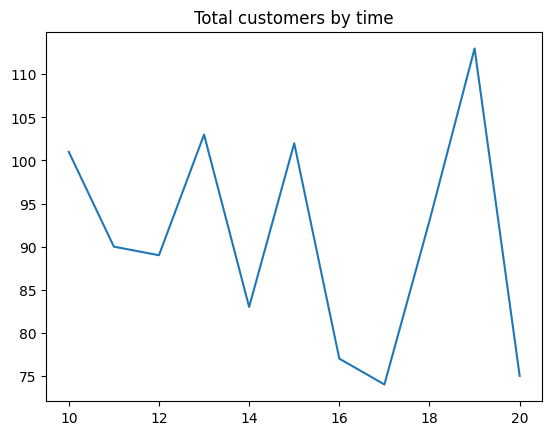

In [16]:
time_counts.plot(title='Total customers by time')

<Axes: title={'center': 'Total customers by time and branch'}, xlabel='Time'>

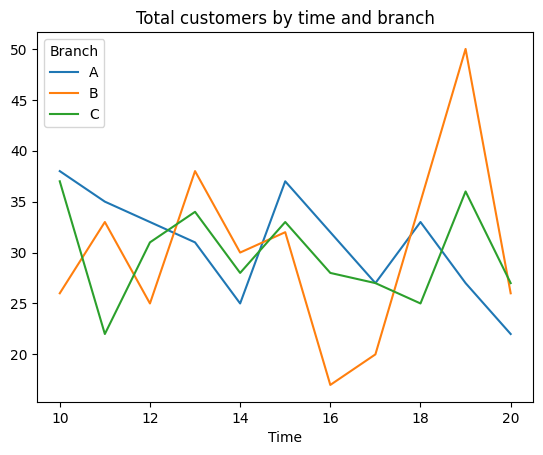

In [17]:
time_sales_bybranch.plot(title="Total customers by time and branch")

####Now we are analysing attendance by day of the week, a monthly analysis is no viable beacause the dataset just covers 3 months in total and cannot show a complete point of view

####We start by transforming the data in the date column to week days and see how many customers we have


In [18]:
day_of_theweek=sms['Date'].dt.day_name()
weekly_sales = Bframe.groupby([day_of_theweek, branch_sales])
weekly_sales_bybranch = weekly_sales.size().unstack()
weekly_sales_bybranch

Branch,A,B,C
Date,,,
Friday,50,51,38
Monday,48,39,38
Saturday,50,60,54
Sunday,52,35,46
Thursday,46,44,48
Tuesday,51,53,54
Wednesday,43,50,50


<Axes: title={'center': 'weekly sales'}, xlabel='Date'>

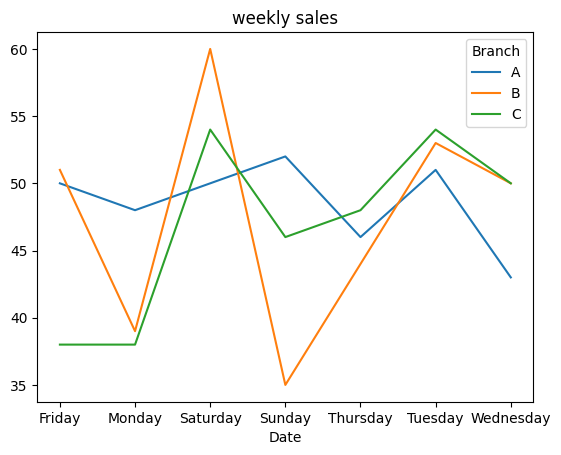

In [19]:
weekly_sales_bybranch.plot(title="weekly sales")

#To Wrap-UP
####This dataset does not refelct a real life scenario and i cannot offer solutions to enhance the bussines. However, is a good excersice for our python capabilities such as date/time manipulation and plotting, and that's all, there is not much to say about this dataset, just dont use it if you are looking for practical applications.